In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor as rfr
get_ipython().magic('matplotlib inline')

In [44]:
cf=rfr(n_estimators = 50, n_jobs=-1,verbose=1)


In [10]:
zspectra = pd.read_csv('fitted_cest.csv', header = None).values
diff = pd.read_csv('dif.csv', header = None).values
conc = pd.read_csv('conc.csv', header = None).values
pH = pd.read_csv('pH.csv', header = None).values
concs = pd.read_csv('concs.csv', header = None).values
pHs = pd.read_csv('pHs.csv', header = None).values

In [3]:
def mymetric(yexp, ypred):
    d = np.sum((yexp - ypred)**2 )
    d = d / ypred.shape[0]
    d = np.sqrt(d)
    d = d / np.mean(yexp)
    d = 100 * d
    return d

In [4]:
Y = pH
Ys = np.sort(pHs)

In [24]:
mymetric(y_test.squeeze(),y_hat)

2.4510586354648836

In [46]:
X = zspectra
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
cf.fit(X_train,y_train.squeeze())
y_hat=cf.predict(X_test)
mymetric(y_test.squeeze(),y_hat)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.6s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


2.4775295701047839

F:\Users\Luis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


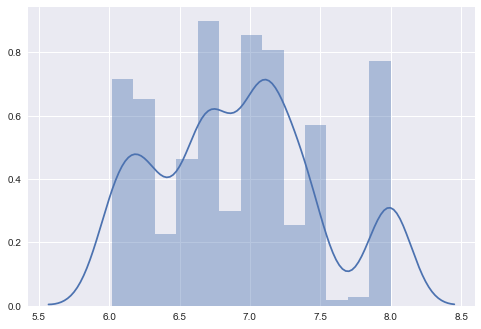

In [48]:
import seaborn as sns
sns.distplot(y_hat)

(-1, 5)

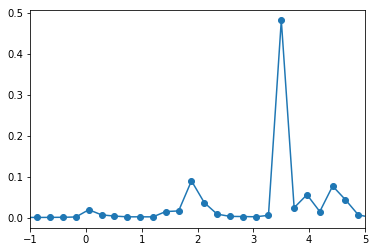

In [30]:
imp=cf.feature_importances_
offset=np.linspace(-8,15,101)
plt.plot(offset,cf.feature_importances_,'-o');
plt.xlim((-1,5))

In [40]:
cf.fit(X_train[:, imp>0.05],y_train.squeeze())
y_hat=cf.predict(X_test[:, imp>0.05])
mymetric(y_test.squeeze(),y_hat)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


3.1121767142081564

F:\Users\Luis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


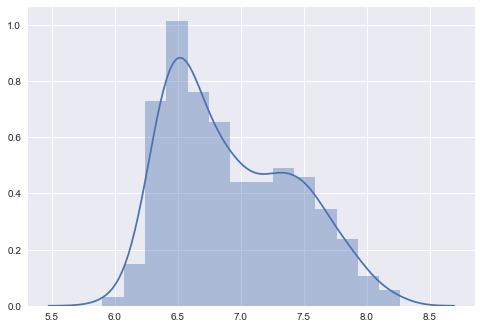

In [51]:
sns.distplot(y_hat);

In [50]:
num_components = X.shape[1]


Error = np.zeros((num_components -1,1))

for idx,K in enumerate(np.arange(1,num_components)):
    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
    pls = PLSRegression(n_components = K, scale = False)
    pls.fit(X_train, y_train)
    y_hat = pls.predict(X_test)
    Error[idx] = mymetric(y_test , y_hat)

plt.plot( np.arange(1,num_components), Error ,'o-')
print('Min = ', Error.min(),'%')

KeyboardInterrupt: 

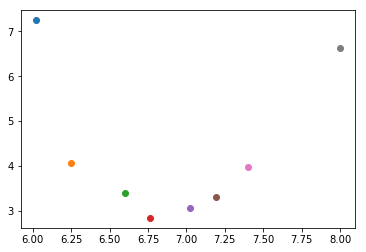

In [6]:
K=Error.argmin()+1
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
pls = PLSRegression(n_components = K, scale = False)
pls.fit(X_train, y_train)
y_hat = pls.predict(X_test)

Error_dum = np.zeros(Ys.shape)
for idk,K in enumerate(np.arange(0,Ys.shape[1])):
    Error_dum[0,K] = mymetric(y_test[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))], y_hat[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))])
    
plt.plot(Ys,Error_dum,'o-')

Min =  4.46196072362 %


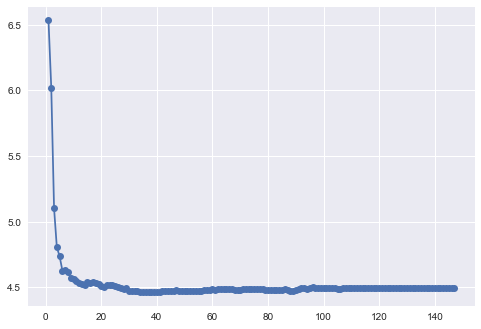

In [49]:
X = np.concatenate((zspectra,t2_signal),axis = 1)
num_components = X.shape[1]


Error = np.zeros((num_components -1,1))

for idx,K in enumerate(np.arange(1,num_components)):
    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
    pls = PLSRegression(n_components = K, scale = False)
    pls.fit(X_train, y_train)
    y_hat = pls.predict(X_test)
    Error[idx] = mymetric(y_test , y_hat)

plt.plot( np.arange(1,num_components), Error ,'o-')
print('Min = ', Error.min(),'%')

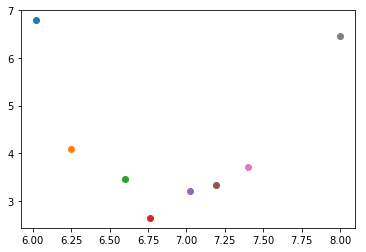

In [8]:
K=Error.argmin()+1
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
pls = PLSRegression(n_components = K, scale = False)
pls.fit(X_train, y_train)
y_hat = pls.predict(X_test)

Error_dum = np.zeros(Ys.shape)
for idk,K in enumerate(np.arange(0,Ys.shape[1])):
    Error_dum[0,K] = mymetric(y_test[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))], y_hat[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))])
    
plt.plot(Ys,Error_dum,'o-')

Min =  4.52295837337 %


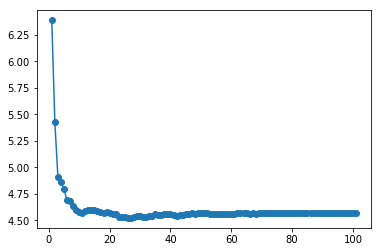

In [9]:
X = np.concatenate((zspectra,t2),axis = 1)
num_components = X.shape[1]


Error = np.zeros((num_components -1,1))

for idx,K in enumerate(np.arange(1,num_components)):
    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
    pls = PLSRegression(n_components = K, scale = False)
    pls.fit(X_train, y_train)
    y_hat = pls.predict(X_test)
    Error[idx] = mymetric(y_test , y_hat)

plt.plot( np.arange(1,num_components), Error ,'o-')
print('Min = ', Error.min(),'%')

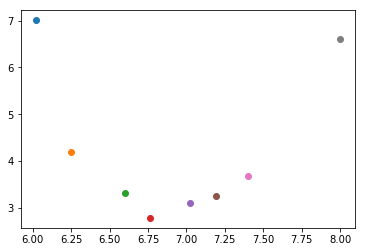

In [10]:
K=Error.argmin()+1
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
pls = PLSRegression(n_components = K, scale = False)
pls.fit(X_train, y_train)
y_hat = pls.predict(X_test)

Error_dum = np.zeros(Ys.shape)
for idk,K in enumerate(np.arange(0,Ys.shape[1])):
    Error_dum[0,K] = mymetric(y_test[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))], y_hat[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))])
    
plt.plot(Ys,Error_dum,'o-')

Min =  7.198785079 %


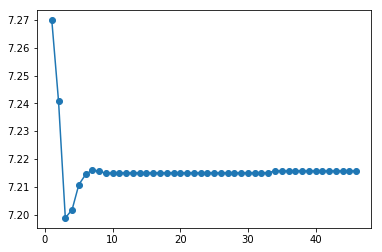

In [11]:
X = t2_signal
num_components = X.shape[1]


Error = np.zeros((num_components -1,1))

for idx,K in enumerate(np.arange(1,num_components)):
    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
    pls = PLSRegression(n_components = K, scale = False)
    pls.fit(X_train, y_train)
    y_hat = pls.predict(X_test)
    Error[idx] = mymetric(y_test , y_hat)

plt.plot( np.arange(1,num_components), Error ,'o-')
print('Min = ', Error.min(),'%')

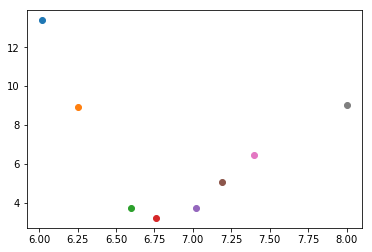

In [12]:
K=Error.argmin()+1
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
pls = PLSRegression(n_components = K, scale = False)
pls.fit(X_train, y_train)
y_hat = pls.predict(X_test)

Error_dum = np.zeros(Ys.shape)
for idk,K in enumerate(np.arange(0,Ys.shape[1])):
    Error_dum[0,K] = mymetric(y_test[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))], y_hat[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))])
    
plt.plot(Ys,Error_dum,'o-')

In [6]:
np.mean(Ys)

6.9049999999999994

In [7]:
np.median(Ys)

6.8899999999999997

In [13]:
X = t2
num_components = X.shape[1]


Error = np.zeros((num_components -1,1))

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
pls = PLSRegression(n_components = num_components, scale = False)
pls.fit(X_train, y_train)
y_hat = pls.predict(X_test)
Error = mymetric(y_test , y_hat)
print('Min = ', Error.min(),'%')

Min =  7.34321700086 %


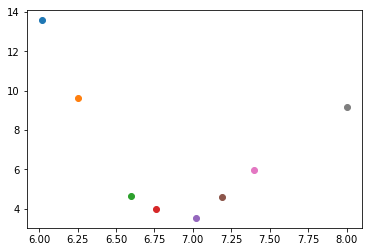

In [14]:
Error_dum = np.zeros(Ys.shape)
for idk,K in enumerate(np.arange(0,Ys.shape[1])):
    Error_dum[0,K] = mymetric(y_test[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))], y_hat[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))])
    
plt.plot(Ys,Error_dum,'o-')

In [15]:
'''
steps = [1,4,8]
labels = list()

for step in steps:
    X = zspectra[:, 0:101:step]
    labels.append(int(X.shape[1]))
    Y = pH
    num_components = 10
    Error = np.zeros((num_components -1,1))

    for idx,K in enumerate(np.arange(1,num_components)):
        X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.50, random_state=42)
        pls = PLSRegression(n_components = K, scale = False)
        pls.fit(X_train, y_train)
        y_hat = pls.predict(X_test)
        Error[idx] = mymetric(y_test , y_hat)

    plt.plot( np.arange(1,num_components), Error ,'o-')
    plt.legend(labels)
'''

"\nsteps = [1,4,8]\nlabels = list()\n\nfor step in steps:\n    X = zspectra[:, 0:101:step]\n    labels.append(int(X.shape[1]))\n    Y = pH\n    num_components = 10\n    Error = np.zeros((num_components -1,1))\n\n    for idx,K in enumerate(np.arange(1,num_components)):\n        X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.50, random_state=42)\n        pls = PLSRegression(n_components = K, scale = False)\n        pls.fit(X_train, y_train)\n        y_hat = pls.predict(X_test)\n        Error[idx] = mymetric(y_test , y_hat)\n\n    plt.plot( np.arange(1,num_components), Error ,'o-')\n    plt.legend(labels)\n"